In [1]:
#Case Study on Human Activity Recognition using Decision Tree

In [2]:
import pandas as pd
import os

subjects_df=pd.DataFrame()
#data_dir="C:\Users\Nitin.Keshav\Desktop\DataScience\Assignment-04\Activity Recognition from Single Chest-Mounted Accelerometer\"

for a,b,c in os.walk(r'C:\Users\Nitin.Keshav\Desktop\DataScience\Assignment-04\Activity Recognition from Single Chest-Mounted Accelerometer'):
    pass



    
for files in c:
    if files.endswith('.csv'):
        os.chdir(r'C:\Users\Nitin.Keshav\Desktop\DataScience\Assignment-04\Activity Recognition from Single Chest-Mounted Accelerometer')
        df=pd.read_csv(files,delimiter=',',header =None)
        df.columns=["sequential number", "x acceleration", "y acceleration", "z acceleration", "label"]
        df['subject_id']=files.split('.csv')[0]
        subjects_df=subjects_df.append(df)


In [3]:
subjects_df.head()

,sequential number,x acceleration,y acceleration,z acceleration,label,subject_id
0,0.0,1502,2215,2153,1,1
1,1.0,1667,2072,2047,1,1
2,2.0,1611,1957,1906,1,1
3,3.0,1601,1939,1831,1,1
4,4.0,1643,1965,1879,1,1


In [4]:
print('Loaded %d subjects' % len(subjects_df.subject_id.unique()))

Loaded 15 subjects


In [4]:
subjects_df.shape[1]

6

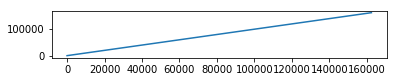

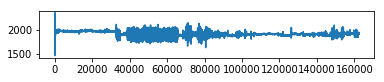

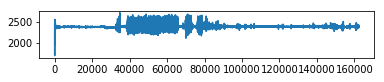

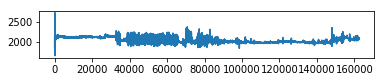

In [8]:
from matplotlib import pyplot
# plot the x, y, z acceleration and activities for a single subject
def plot_subject(subject):
    pyplot.figure()
    # create a plot for each column
    for col in range(subject.shape[1]):
        pyplot.subplot(subject.shape[1], 1, col+1)
        pyplot.plot(subject[:,col])
        pyplot.show()
    # plot activities for a single subject
plot_subject(subjects_df[subjects_df.subject_id=="1"].iloc[:,:4].values)

In [5]:
X = subjects_df[['x acceleration','y acceleration','z acceleration']]
y = subjects_df[['label']]

In [6]:
# evaluate the model by splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

# calculate cross-validated AUC
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
# use the model to make predictions with the test data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Import metrics


In [ ]:
from sklearn import metrics
# generate evaluation metrics-
print(metrics.accuracy_score(y_test, y_pred))

In [59]:
# Print out the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[   139    458     13     86    147     21     33    191]
 [   487 156186   3436   3984   7927   1276    700   9153]
 [    24   5158   2954   1151   2462    285    174   2002]
 [   108   4268   1313  29099  12320   2787   1871  13022]
 [   191   8452   2836  13885  59035   5258   2824  14634]
 [    22   1336    277   3674   4358   2487    606   2491]
 [    31    679    188   2369   2434    820   3141   4682]
 [   183  10404   2285  15652  15412   2979   4942 126267]]


In [60]:
# Print out the classification report, and check the f1 score
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.13      0.12      1088
           1       0.84      0.85      0.84    183149
           2       0.22      0.21      0.21     14210
           3       0.42      0.45      0.43     64788
           4       0.57      0.55      0.56    107115
           5       0.16      0.16      0.16     15251
           6       0.22      0.22      0.22     14344
           7       0.73      0.71      0.72    178124

   micro avg       0.66      0.66      0.66    578069
   macro avg       0.41      0.41      0.41    578069
weighted avg       0.66      0.66      0.66    578069



In [62]:
y_pred=pd.DataFrame(data=y_pred,columns=['Predicted'])
id = pd.DataFrame(data=X_test.index.values,columns=['ID'])
output=pd.concat([id,y_pred],axis=1)
output.to_csv('XGBoost_Casestudy_2_Session23.csv',index=False)